Write your journal entry for today:  Had a good day!!!



🧠 Mood: Positive
💊 Symptoms found: None

✅ Entry saved to diary_log.csv


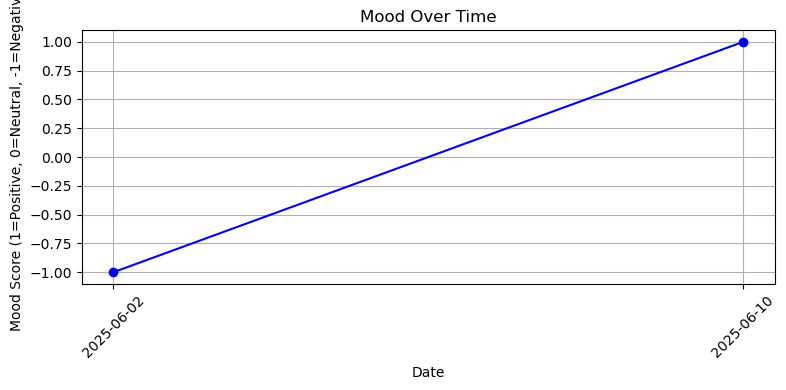


📅 Your Diary Entries so far:


,Date,Entry,Mood,Symptoms,MoodScore
0,2025-06-02,My cough has gotten worse since yesterday,Negative,cough,-1
1,2025-06-10,Had a good day!!!,Positive,,1


In [1]:
from textblob import TextBlob
import re
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os

# List of common symptom keywords
symptom_keywords = ['headache', 'fever', 'fatigue', 'cough', 'sore throat', 
                    'nausea', 'pain', 'dizzy', 'cold', 'tired']

# Prompt user for daily journal entry
entry = input("Write your journal entry for today: ")

# Analyze sentiment (polarity)
blob = TextBlob(entry)
polarity = blob.sentiment.polarity

# Categorize mood based on polarity score
if polarity > 0.2:
    mood = "Positive"
elif polarity < -0.2:
    mood = "Negative"
else:
    mood = "Neutral"

print(f"\n🧠 Mood: {mood}")

# Extract symptoms found in the entry
found_symptoms = [word for word in symptom_keywords if re.search(r'\b' + word + r'\b', entry.lower())]
print(f"💊 Symptoms found: {found_symptoms if found_symptoms else 'None'}")

# Prepare new entry data
data = {
    'Date': [datetime.today().strftime('%Y-%m-%d')],
    'Entry': [entry],
    'Mood': [mood],
    'Symptoms': [', '.join(found_symptoms)]
}

new_df = pd.DataFrame(data)

csv_file = 'diary_log.csv'

# Load existing CSV or create new if not found or corrupted
if os.path.exists(csv_file):
    try:
        old_df = pd.read_csv(csv_file, encoding='utf-8')  # Corrected: no errors= argument
        df = pd.concat([old_df, new_df], ignore_index=True)
    except Exception as e:
        print(f"⚠️ Warning: Could not read existing CSV file due to error:\n{e}")
        print("Creating a new clean CSV file to avoid issues.")
        df = new_df  # start fresh
else:
    df = new_df  # no existing file, start fresh

# Save combined data back to CSV (UTF-8 encoded)
df.to_csv(csv_file, index=False, encoding='utf-8')
print("\n✅ Entry saved to diary_log.csv")

# Map moods to numeric values for plotting
mood_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['MoodScore'] = df['Mood'].map(mood_map)

# Plot mood trend if there is more than one entry
if len(df) > 1:
    plt.figure(figsize=(8,4))
    plt.plot(df['Date'], df['MoodScore'], marker='o', linestyle='-', color='blue')
    plt.title('Mood Over Time')
    plt.xlabel('Date')
    plt.ylabel('Mood Score (1=Positive, 0=Neutral, -1=Negative)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Add more entries to see mood trend graph.")

# Display diary log table in notebook
print("\n📅 Your Diary Entries so far:")
display(df)
